<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# !git clone https://github.com/hungpham13/Distributed-data-discretization
# %cd Distributed-data-discretization/
# !pip install -r requirements.txt

In [26]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

100%|██████████| 364/364 [00:08<00:00, 41.87it/s]


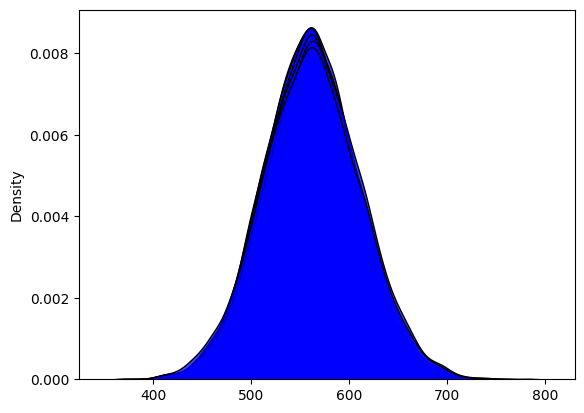

[[575 557 483 ... 570 620   0]
 [586 620 539 ... 562 576   0]
 [505 582 548 ... 547 533   0]
 [551 579 606 ... 719 542   0]
 [528 540 573 ... 594 506   0]]


In [27]:
from data.gen_data import generate_data
datas = []
# for num_days in [30, 6*30, 365, 2*365, 3*365]:
#     for num_sample in [10000, 100000, 1000000, 10000000]:
#         for dist in ['normal', 'logistic', 'uniform']:
#             datas.append(generate_data(num_days, num_sample, dist))
data = generate_data(365, 10000, 'normal')

In [28]:
data[0, :-1]
print(np.max(data[:,:-1]), np.max(data[:,:-1]) <= 850)
print(np.min(data[:, :-1]), np.min(data[:, :-1]) >=300)

828 True
308 True


In [29]:
from model.psi import get_breakpoint 
from model.psi import calculate_psi

breakpoints = get_breakpoint(data[:,:-1].reshape(-1), buckettype='bins', buckets=10)
print(breakpoints)
for i in range(len(data) - 1):
    psi = calculate_psi(expected=data[i, :-1], actual=data[i + 1, :-1],
                        breakpoints=breakpoints)
    if (data[i + 1, -1] == 0 and psi > 0.1):
        print(psi)

[308. 360. 412. 464. 516. 568. 620. 672. 724. 776. 828.]
